<a href="https://colab.research.google.com/github/JDaviA/Desafio/blob/main/Matriz_de_confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.4352 - val_accuracy: 0.9609 - val_loss: 0.1404
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9647 - loss: 0.1249 - val_accuracy: 0.9650 - val_loss: 0.1106
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9757 - loss: 0.0809 - val_accuracy: 0.9749 - val_loss: 0.0818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9833 - loss: 0.0581 - val_accuracy: 0.9743 - val_loss: 0.0821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9871 - loss: 0.0440 - val_accuracy: 0.9771 - val_loss: 0.0813
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


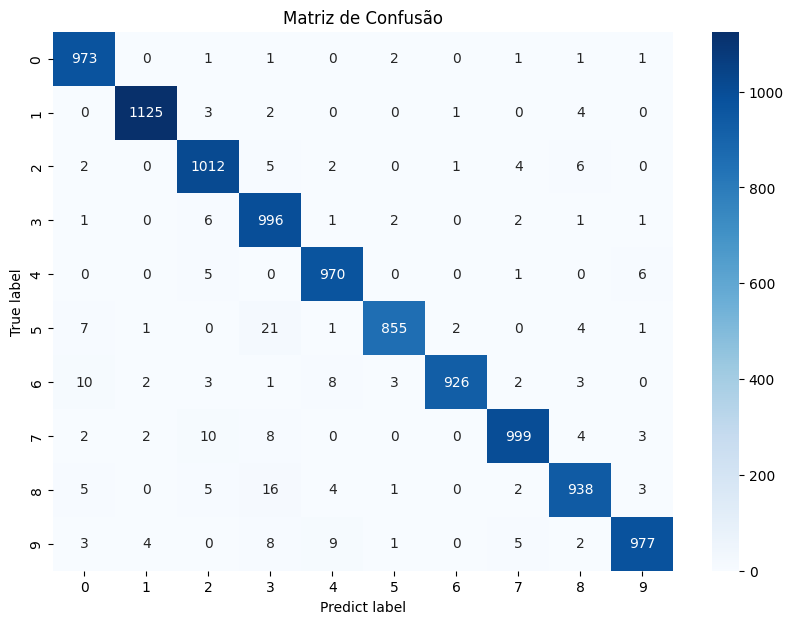

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

vp = np.diag(cm)
fp = cm.sum(axis=0) - vp
fn = cm.sum(axis=1) - vp
vn = cm.sum() - (fp + fn + vp)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.title('Matriz de Confusão')
plt.show()
